## Import data set

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # example dataset for wine classification
from sklearn.model_selection import train_test_split # function to split testing and training datasets
from sklearn.svm import SVC # class Support Vector Machine
from sklearn.model_selection import validation_curve # function too stract error through validation
from sklearn.metrics import plot_confusion_matrix #function to plot confution matrix


data = load_wine(as_frame=True, # return only data as tuple (parametrs, target)
                 return_X_y=True # return as pandas dataframe
                )
df_wine_predictors = data[0]
df_wine_target = data[1]


# Visualize 
print("PREDICTORS (X) \n")
print(df_wine_predictors.head())
print("Number of predictors:", df_wine_predictors.shape[1])
print("Number of samples:", df_wine_predictors.shape[0])
print("--------------------------------------------------------\n")

print("TARGET CLASSES (Y)  \n")
print(df_wine_target.head(),"\n") 
print("----------------------------------------------------------")
print("Wine Classes: {} -->> [0: bad wine, 1: goof wine, 2:excellent wine]".format(df_wine_target.unique()))


PREDICTORS (X) 

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0 

## Check the data

In [33]:
# Basic check for errors in the dataset
print("Verify the type of data within the columns:\n")
print(df_wine_predictors.dtypes,"\n")
df_wine_predictors.columns.to_list()

print("----------------------------------------")
 
print("Check for NaN under the columns:\n")
for column in df_wine_predictors.columns.to_list():
    print(column,":",df_wine_predictors[column].isnull().any())

Verify the type of data within the columns:

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object 

----------------------------------------
Check for NaN under the columns:

alcohol : False
malic_acid : False
ash : False
alcalinity_of_ash : False
magnesium : False
total_phenols : False
flavanoids : False
nonflavanoid_phenols : False
proanthocyanins : False
color_intensity : False
hue : False
od280/od315_of_diluted_wines : False
proline : False


# Split training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_wine_predictors,  
                                                    df_wine_target,
                                                    test_size=0.33, # percentage of data that goes into the testing set
                                                    random_state=42 # seed for random selection of data
                                                   )

# visualize
print("TRAINING DATASET PREDICTORS")
print(X_train.head(), "\n")
print("dataframe size", X_train.shape,"\n")
print("------------------------------------------")
print("TRAINING DATASET TARGET")
print(y_train,"\n")
print()
print("------------------------------------------------------------------------------------\n")

print("TESTING DATASET PREDICTORS")
print(X_test.head())
print("dataframe size", X_test.shape,"\n")
print("------------------------------------------")
print("TESTING DATASET TARGET")
print(y_test.head())
print("Vector size", y_test.shape)


TRAINING DATASET PREDICTORS
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
22     13.71        1.86  2.36               16.6      101.0           2.61   
146    13.88        5.04  2.23               20.0       80.0           0.98   
97     12.29        1.41  1.98               16.0       85.0           2.55   
69     12.21        1.19  1.75               16.8      151.0           1.85   
167    12.82        3.37  2.30               19.5       88.0           1.48   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
22         2.88                  0.27             1.69             3.80  1.11   
146        0.34                  0.40             0.68             4.90  0.58   
97         2.50                  0.29             1.77             2.90  1.23   
69         1.28                  0.14             2.50             2.85  1.28   
167        0.66                  0.40             0.97            10.26  0.72   

     od280

## k-fold Cross Validation

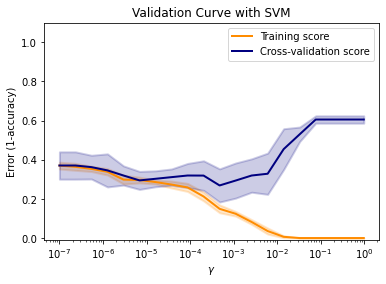

In [4]:
# interval of possible parameters 
param_range = np.logspace(-7, -0.01, 20) 

# Peform 5-fold cross-validation and save training and validation error
train_scores, test_scores = validation_curve(
    SVC(),
    X_train, 
    y_train,
    param_name="gamma", # parameter to vary
    param_range=param_range,
    scoring="accuracy", 
    cv=5,    # number of folders
)


# convert accuracy into error
train_error = 1-train_scores
validation_error = 1-test_scores

# compute 5-fold cross-validation mean and std of error 
train_error_mean = np.mean(train_error, axis=1)
train_error_std = np.std(train_error, axis=1)
validation_error_mean = np.mean(validation_error, axis=1)
validation_error_std = np.std(validation_error, axis=1)

# visualize
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Error (1-accuracy)")
plt.ylim(-0.01, 1.1)
lw = 2
plt.semilogx(
    param_range, train_error_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_error_mean - train_error_std,
    train_error_mean + train_error_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, validation_error_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    validation_error_mean - validation_error_std,
    validation_error_mean + validation_error_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

## Choose optimal parameter


In [12]:
# save optimal gamma
index_min = min(range(len(validation_error_mean)), key=validation_error_mean.__getitem__)
validation_error_min = validation_error_mean[index_min]
gamma_opt = param_range[index_min] # gamma that gives minimun validation error

# visualize 
columns = ["Mean validation error","gamma"]
array = np.array([validation_error_mean, param_range]).transpose()

print( pd.DataFrame(array,columns=columns), "\n")
print("Minimun mean validation error:", validation_error_min)
print("optimal gamma:", gamma_opt)

    Mean validation error         gamma
0                0.370290  1.000000e-07
1                0.370290  2.332893e-07
2                0.361957  5.442388e-07
3                0.345290  1.269651e-06
4                0.319203  2.961958e-06
5                0.294203  6.909931e-06
6                0.302536  1.612013e-05
7                0.310870  3.760652e-05
8                0.319203  8.773197e-05
9                0.318841  2.046693e-04
10               0.268478  4.774714e-04
11               0.293478  1.113889e-03
12               0.319203  2.598584e-03
13               0.328261  6.062218e-03
14               0.453986  1.414250e-02
15               0.529710  3.299294e-02
16               0.605072  7.696899e-02
17               0.605072  1.795604e-01
18               0.605072  4.188951e-01
19               0.605072  9.772372e-01 

Minimun validaiton error: 0.2684782608695652
optimal gamma: 0.00047747140601752975


## Train the optimal hypothesis model

In [15]:
# train optimal model and evaluate accuracy 
h_opt = SVC(gamma=gamma_opt) # instiate optimal model 
h_opt.fit(X_train,y_train) # train the model to the entire training set
print("Error (1-Accuracy) of h_opt on testing data: \n -->>",1- h_opt.score(X_test,y_test)) 

Error (1-Accuracy) of h_opt on testing data: 
 -->> 0.30508474576271183


## Performance evaluation

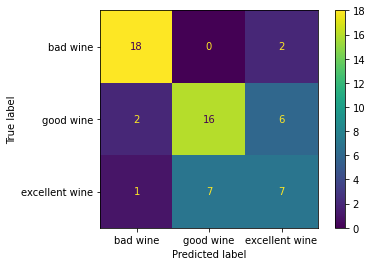

In [14]:
#plot confution Matrix
plot_confusion_matrix(h_opt, # trained optimal hypothesis model
                      X_test, 
                      y_test,
                      display_labels=["bad wine", "good wine", "excellent wine"]
                     )
plt.show()